In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.stats as stats

plt.rcParams['axes.linewidth'] = 1.5

In [2]:
# Load Meiklejohn Peak data, remove samples with no d44Ca
df = pd.read_csv('Data/MeiklejohnCa.csv')
df_srca= df.dropna(subset=['Sr/Ca', 'd44Ca'])

# Load Tang et al 2008 Data remove outliers
dx = pd.read_csv('Data/Tang_etal_2008.csv')
dx_srca = dx[dx['Sr_calc']>400]

In [3]:
# Linear Regression
mp_linres = stats.linregress(df_srca['d44Ca'], df_srca['Sr/Ca'])
tang_linres = stats.linregress(dx_srca['D44Ca'], dx_srca['SrCa'])

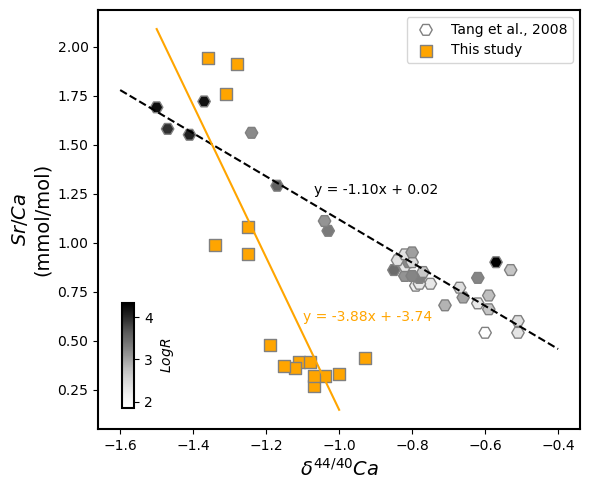

In [4]:
fig, ax = plt.subplots(figsize=(6,5))

mplot = ax.scatter(dx_srca['D44Ca'], dx_srca['SrCa'], c=dx_srca['logR'], 
           ec='grey' ,cmap='Greys',s=80, marker='H', label='Tang et al., 2008')
ax.scatter(df_srca['d44Ca'], df_srca['Sr/Ca'], fc='orange', marker='s', 
           ec='grey', s=75, label='This study')

ax.set_xlabel('$\delta^{44/40}Ca$', fontsize=14)
ax.set_ylabel('$Sr/Ca$\n(mmol/mol)', fontsize=14)
ax.legend()

# Regression line
x1 = np.linspace(-1.6, -0.4, 10)
x2 = np.linspace(-1.5, -1, 10)
ax.plot(x1, x1*tang_linres.slope + tang_linres.intercept, c='k', ls='--')
ax.plot(x2, x2*mp_linres.slope + mp_linres.intercept, c='orange', ls='-')

# ax.grid()

ax.text(-1.07, 1.25, 'y = {:.2f}x + {:.2f}'.format(tang_linres.slope, tang_linres.intercept))
ax.text(-1.1, 0.6, 'y = {:.2f}x + {:.2f}'.format(mp_linres.slope, mp_linres.intercept),
        c='orange')

fig.tight_layout()

axins = inset_axes(
    ax,
    width="2.5%",  # width: 5% of parent_bbox width
    height="25%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=(0.05, 0.05, 1, 1),
    bbox_transform=ax.transAxes,
    borderpad=0,
)

# Add colorbar
cbar = fig.colorbar(mplot, cax=axins)
cbar.ax.set_ylabel('$LogR$', fontsize=10)

plt.savefig('Figure/Kinetics_SrCaPlot.png', dpi=300)
plt.savefig('Figure/Kinetics_SrCaPlot.svg')